In [ ]:
import pandas as pd
import numpy as np

In [ ]:
movie_data=pd.read_csv('/content/IMDB Dataset.csv')

In [ ]:
movie_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
movie_data['review'].isnull().sum()

0

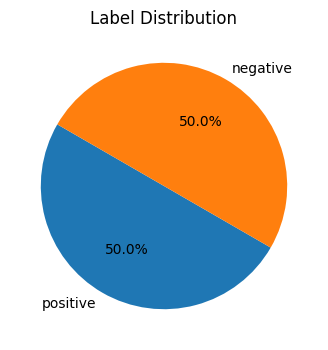

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
class_counts = movie_data['sentiment'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%',startangle=150)
plt.title('Label Distribution')
plt.show()

In [ ]:
import re
def remove_html(text):
  return re.sub('<.*?>', '', text)

In [ ]:
movie_data['review']=movie_data['review'].apply(remove_html)

In [ ]:
movie_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
def lower(text):
  return text.lower()

movie_data['review']=movie_data['review'].apply(lower)

In [ ]:
def remove_special(text):
  x=''
  for i in text:
    if i.isalnum():
      x=x+i
    else:
      x=x + ' '
  return x

movie_data['review']=movie_data['review'].apply(remove_special)
movie_data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there s a family where a little boy ...,negative
4,petter mattei s love in the time of money is...,positive


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def delete_stopwords(text):
  x=[]
  for i in text.split():
    if i not in stopwords.words('english'):
      x.append(i)
  y=x[:]
  x.clear()
  return y

In [ ]:
movie_data['review']=movie_data['review'].apply(delete_stopwords)

In [29]:
movie_data.head()

,review,sentiment
0,one review mention watch 1 oz episod hook righ...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic famili littl boy jake think zombi closet...,0
4,petter mattei love time money visual stun film...,1


In [16]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
y=[]
def stem_words(text):
  for i in text:
    y.append(ps.stem(i))
  z=y[:]
  y.clear()
  return z

In [ ]:
movie_data['review']=movie_data['review'].apply(stem_words)

In [18]:
movie_data.head()

,review,sentiment
0,"[one, review, mention, watch, 1, oz, episod, h...",positive
1,"[wonder, littl, product, film, techniqu, unass...",positive
2,"[thought, wonder, way, spend, time, hot, summe...",positive
3,"[basic, famili, littl, boy, jake, think, zombi...",negative
4,"[petter, mattei, love, time, money, visual, st...",positive


In [19]:
def join_words(text):
  return ' '.join(text)
movie_data['review']=movie_data['review'].apply(join_words)

In [20]:
movie_data.head()

,review,sentiment
0,one review mention watch 1 oz episod hook righ...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic famili littl boy jake think zombi closet...,negative
4,petter mattei love time money visual stun film...,positive


In [21]:
X=movie_data['review'].values
x_d=X[1]
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
vectorizer.fit(X)
X=vectorizer.transform(X)

In [22]:
movie_data['sentiment'].replace({'positive':1,'negative':0},inplace=True)
Y=movie_data['sentiment'].values

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [24]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train,Y_train)

MultinomialNB()

In [25]:
Y_pred=model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.8546

In [28]:
X_new=X_test[1]
print(x_d)
prediction=model.predict(X_new)
print(prediction)
if(prediction[0]==1):
  print('Positive review')
else:
  print('Negative review')

wonder littl product film techniqu unassum old time bbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done
[1]
Positive review
